https://github.com/deaa-pro/aws_deaa_case_study_3


In [1]:
# importing the necessary libraries 
import os
import sys
import numpy as np
import pandas as pd
from stat import *
import seaborn as sns
from time import sleep
!pip install scikit_posthocs
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import statsmodels.stats.multitest as sm 
from scipy.stats import wilcoxon, friedmanchisquare

# Reading the whole dataset

In [2]:
def PathToDict(path):
    st = os.stat(path)
    result = {} #data frame holds folders and fils as tree
    result['full_path'] = path
    if S_ISDIR(st.st_mode): # check if contants of path is file or directory
        result['items'] = { # if true (Folder) insert to folder to read all contants
 # this recursive function that access all folders and all contants recursively
            name : PathToDict(path+'/'+name) for name in os.listdir(path)}
    else:
        # if file put type file 
        result['type'] = 'f' #put typr f => file 
    return result

rows = 14
dims = [10, 30, 50, 100]

# building a directory contains the full data paths
path = 'CEC-2014-Results/'
directory = PathToDict(path)

# Algorithms subdir names
subdir = list(directory['items'].keys())



In [32]:
subdir

['.DS_Store',
 'b3e3pbest',
 'CMLSP',
 'DE_b6e6rlwithrestart',
 'FCDE',
 'FERDE',
 'FWA-DM',
 'GaAPADE',
 'L-SHADE',
 'MVMO',
 'NRGA',
 'OptBees',
 'POBL_ADE',
 'rmalschcma',
 'RSDE',
 'SOO',
 'SOO+BOBYQA',
 'UMOEAS']

In [3]:
%%time

# Main code $$$$$
# Creating table for each Dim for each Algorithm on the last row "17"
rows = 14
dims = [10, 30, 50, 100]

# for each algorithm
for i in range(len(subdir)):
    if subdir[i] != '.DS_Store':
        print(subdir[i])
        #contain all files in directory 
        subfiles = set(directory['items'][subdir[i]]['items'].keys()) 
        #to access all dimintions [10,30,50,100]
        for dim in dims:
        
        #to filter 120 file and take first dimition 10 contain 30 file then take 30 then 50 then 100
            subfiles_dim = list(filter(lambda x: (f'D{dim}_' in x) | (x.endswith(f'{dim}.txt')), subfiles))

            # for each function in the 30 functions
            for ind in range(len(subfiles_dim)):
                #check this folder becouse have different pattern of name  
                if subdir[i] != 'DE_b6e6rlwithrestart':
                    #get function number
                    f = subfiles_dim[ind].split('_')[-2]
                else:
                    #get function number
                    f = subfiles_dim[ind].split('_')[-4][1:]
                # to get full path for file to open and calculate mean and standard deveation
                file = directory['items'][subdir[i]]['items'][subfiles_dim[ind]]['full_path']

                df = pd.read_csv(file, sep=r'\s{1,}', header=None, engine='python')
                # handling transpose files
                if df.shape != (14, 51):
                    df = df.T
                # calculate mean and standard deveation for all rows in fil
                means = df.mean(axis=1)
                stds  = df.std(axis=1)

                # roll over each row table and save its mean and std
                for row in range(rows):
                    # to open file by dimintion number and function nunber
                    df_table = pd.read_csv('tables/Table_D'+str(dim)+'_'+str(row+1)+'.csv', index_col=0)
                    #to put value of mean in table 
                    df_table.loc[(int(f)-1)*2  , ['function', 'Criteria', subdir[i]]] = ['f'+f, 'Mean', means[row]]
                    #to put value of standard deveation in table and 
                    df_table.loc[(int(f)-1)*2+1, ['function', 'Criteria', subdir[i]]] = ['f'+f, 'Std.', stds[row]]
                    df_table.to_csv('tables/Table_D'+str(dim)+'_'+str(row+1)+'.csv')

# sort all tables by index
for dim in dims:
    for row in range(14):
        df_t = pd.read_csv('tables/Table_D'+str(dim)+'_'+str(row+1)+'.csv', index_col=0)
        df_t.sort_index(inplace=True)
        df_t.to_csv('tables/Table_D'+str(dim)+'_'+str(row+1)+'.csv')

b3e3pbest
CMLSP
DE_b6e6rlwithrestart
FCDE
FERDE
FWA-DM
GaAPADE
L-SHADE
MVMO
NRGA
OptBees
POBL_ADE
rmalschcma
RSDE
SOO
SOO+BOBYQA
UMOEAS
Wall time: 6min 23s


#  Reading The table 

In [4]:
#ask user to insert data 
#dim => dimintion number
#parameter => function number
#alpha => value used to determine if algorithem reject or not by compare this value with Pvalue
file = "tables/"
dim       = input('enter the dimension number')
parameter = input('enter the row number')
alpha     = input('enter the alpha value')



enter the dimension number10
enter the row number13
enter the alpha value0.05


In [5]:
#open table based on dimintion number enterd by user and function number
df1 = pd.read_csv(file+'Table_D'+dim+'_'+parameter+'.csv')
df1.drop(df1.columns[0],axis=1,inplace =True)
#show first 6 row in table 
df1.head(6)

,function,Criteria,b3e3pbest,CMLSP,DE_b6e6rlwithrestart,FCDE,FERDE,FWA-DM,GaAPADE,L-SHADE,MVMO,NRGA,OptBees,POBL_ADE,rmalschcma,RSDE,SOO,SOO+BOBYQA,UMOEAS
0,f1,Mean,3.640036e+06,5.035647e-07,0.0,0.0,203.982219,7.086598e+03,0.0,0.0,6.265762e-04,29877.808450,860.062246,79967.384397,0.000000,0.0,8.810740e+06,1.436380e+03,0.0
1,f1,Std.,1.099701e+07,1.037923e-06,0.0,0.0,540.907923,2.097092e+04,0.0,0.0,9.206278e-04,33378.517806,711.706069,318194.898135,0.000000,0.0,0.000000e+00,6.889085e-13,0.0
2,f2,Mean,2.852908e+08,1.114576e-15,0.0,0.0,0.000108,1.342007e-04,0.0,0.0,1.104752e-07,917.607221,0.169841,8048.513782,0.000000,0.0,8.953000e+00,2.100000e-02,0.0
3,f2,Std.,8.093203e+08,5.571768e-15,0.0,0.0,0.000203,9.583748e-04,0.0,0.0,1.542267e-07,1110.135874,1.119865,34761.325604,0.000000,0.0,8.970162e-15,1.051191e-17,0.0
4,f3,Mean,5.724563e+03,1.722621e-04,0.0,0.0,0.001506,4.175362e-09,0.0,0.0,2.697588e-10,1551.635851,1.355968,0.004465,0.044408,0.0,6.643670e+03,6.076190e+03,0.0
5,f3,Std.,1.354099e+04,2.764624e-04,0.0,0.0,0.001164,1.470033e-08,0.0,0.0,1.228703e-09,1517.238443,3.582063,0.016256,0.317138,0.0,9.185446e-13,1.837089e-12,0.0


In [6]:
#show table with only "mean" criteria 
df1[df1['Criteria']=='Mean'].head()

,function,Criteria,b3e3pbest,CMLSP,DE_b6e6rlwithrestart,FCDE,FERDE,FWA-DM,GaAPADE,L-SHADE,MVMO,NRGA,OptBees,POBL_ADE,rmalschcma,RSDE,SOO,SOO+BOBYQA,UMOEAS
0,f1,Mean,3.640036e+06,5.035647e-07,0.000000,0.000000,203.982219,7.086598e+03,0.000000,0.000000,6.265762e-04,29877.808450,860.062246,79967.384397,0.000000,0.000000,8810740.000,1436.380,0.000000
2,f2,Mean,2.852908e+08,1.114576e-15,0.000000,0.000000,0.000108,1.342007e-04,0.000000,0.000000,1.104752e-07,917.607221,0.169841,8048.513782,0.000000,0.000000,8.953,0.021,0.000000
4,f3,Mean,5.724563e+03,1.722621e-04,0.000000,0.000000,0.001506,4.175362e-09,0.000000,0.000000,2.697588e-10,1551.635851,1.355968,0.004465,0.044408,0.000000,6643.670,6076.190,0.000000
6,f4,Mean,5.644364e+01,3.343729e-15,1.959705,18.411184,0.000000,1.498876e+00,30.688235,29.409553,9.545624e+00,15.439398,2.775313,28.451712,0.085008,2.810970,0.683,0.000,0.000000
8,f5,Mean,1.976280e+01,1.726059e+01,18.744286,20.331955,19.338862,2.003144e+01,19.703622,14.992038,1.721883e+01,19.606883,19.999974,19.425737,13.666322,19.216311,20.000,20.000,17.010059


In [7]:
# df2 dataframe contain table with only mean for values 
df2 = df1[df1['Criteria']=='Mean']
df2.shape

(30, 19)

# Wilcoxon and Friedman

In [8]:
def Wilcoxon(df, ref):
    col = [*df.columns]
    col.remove(ref)
    # wilcoxon function take 2 parameter best algorithim and ather algorithm 
    #to check if there are statistically deffrance between this two algorithim
    wilc_test = [wilcoxon(df[i],df[ref]) for i in col]    
    w_res = pd.DataFrame(wilc_test)
    w_res['algorithm']= [i for i in col]
    w_res = w_res.iloc[:,[2,0,1]]
    #after compare all algorithim with best algorithim print best algorithm 
    print('best algorithm is ',ref)
    return w_res

### Friedman Test

In [9]:
#perform Friedman Test
algo_data = df2.iloc[:,2:].T
freidman = friedmanchisquare(*algo_data.values.tolist())
freidman

FriedmanchisquareResult(statistic=232.60016488046142, pvalue=1.8830225242716905e-40)

### Ranking

In [10]:
rank = df2.iloc[:,2:].rank(axis=1).reset_index()
rank.iloc[:,1:]

,b3e3pbest,CMLSP,DE_b6e6rlwithrestart,FCDE,FERDE,FWA-DM,GaAPADE,L-SHADE,MVMO,NRGA,OptBees,POBL_ADE,rmalschcma,RSDE,SOO,SOO+BOBYQA,UMOEAS
0,16.0,8.0,4.0,4.0,10.0,13.0,4.0,4.0,9.0,14.0,11.0,15.0,4.0,4.0,17.0,12.0,4.0
1,17.0,8.0,4.0,4.0,10.0,11.0,4.0,4.0,9.0,15.0,13.0,16.0,4.0,4.0,14.0,12.0,4.0
2,15.0,9.0,3.5,3.5,10.0,8.0,3.5,3.5,7.0,14.0,13.0,11.0,12.0,3.5,17.0,16.0,3.5
3,17.0,4.0,8.0,13.0,2.0,7.0,16.0,15.0,11.0,12.0,9.0,14.0,5.0,10.0,6.0,2.0,2.0
4,12.0,5.0,6.0,17.0,8.0,16.0,11.0,2.0,4.0,10.0,13.0,9.0,1.0,7.0,14.5,14.5,3.0
5,17.0,9.0,2.0,16.0,12.0,11.0,10.0,7.0,6.0,14.0,15.0,13.0,3.0,8.0,4.5,4.5,1.0
6,17.0,2.0,7.0,15.0,8.0,12.0,5.0,4.0,6.0,16.0,13.0,14.0,2.0,9.0,10.5,10.5,2.0
7,14.0,11.0,3.5,15.0,3.5,9.0,3.5,3.5,7.0,12.0,8.0,13.0,3.5,10.0,16.5,16.5,3.5
8,17.0,1.0,7.0,16.0,8.0,9.0,6.0,2.0,5.0,11.0,15.0,10.0,4.0,14.0,12.5,12.5,3.0
9,17.0,14.0,1.0,16.0,3.0,6.0,4.0,2.0,7.0,10.0,15.0,13.0,8.0,9.0,11.5,11.5,5.0


In [11]:
# calculate mean for rank
rank_mean= rank.iloc[:,1:].mean().reset_index()
# two columns names [Algorithm and Ranking]
rank_mean.columns = ['Algorithm', f'Ranking (D = {dim})']
# to put statistics and Pvalue values in table 
rank_mean.loc[len(rank_mean)] = ['Statistic', freidman.statistic]
rank_mean.loc[len(rank_mean)] = ['P-value', freidman.pvalue]
rank_mean[f'Ranking (D = {dim})'] = rank_mean[f'Ranking (D = {dim})'].round(6)
rank_mean

,Algorithm,Ranking (D = 10)
0,b3e3pbest,6.066667
1,CMLSP,12.133333
2,DE_b6e6rlwithrestart,7.833333
3,FCDE,7.766667
4,FERDE,11.066667
5,FWA-DM,7.800000
6,GaAPADE,14.300000
7,L-SHADE,14.133333
8,MVMO,12.200000
9,NRGA,6.700000


# preprocessing

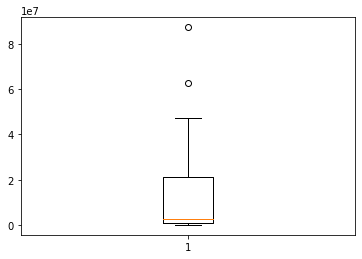

In [12]:
plt.boxplot(algo_data.T.mean());

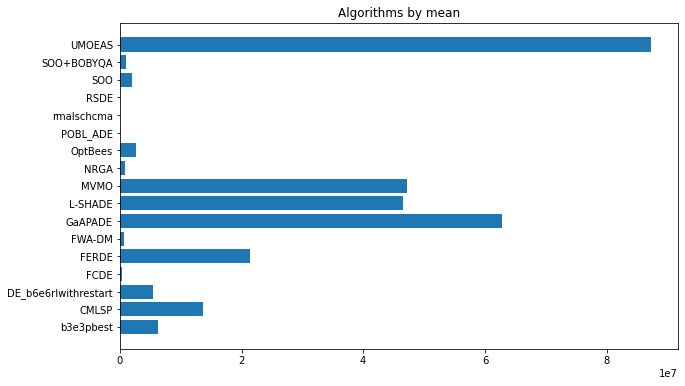

In [13]:
#bar blot that represent  algorithm means and smallest mean represent best algorithm
plt.figure(figsize=(10, 6))
plt.barh(y=algo_data.mean(axis=1).index, 
        width=algo_data.mean(axis=1))

plt.title('Algorithms by mean')
plt.show()

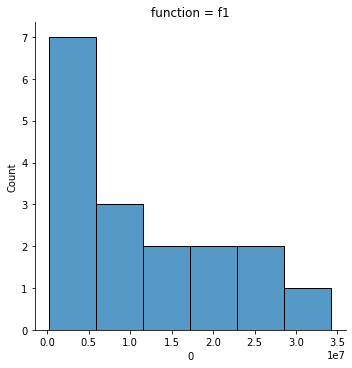

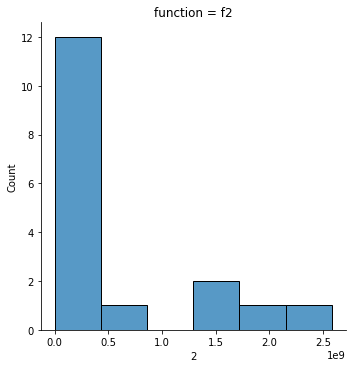

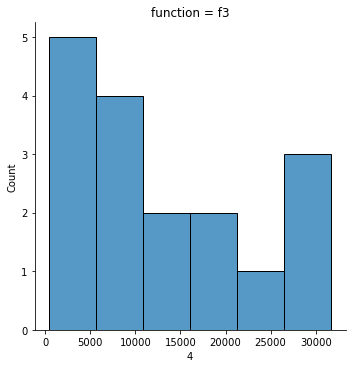

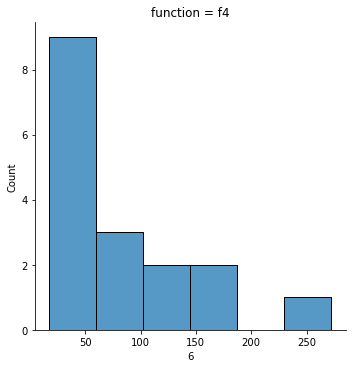

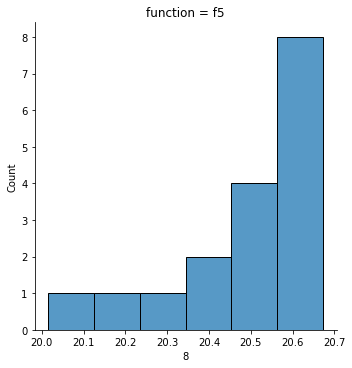

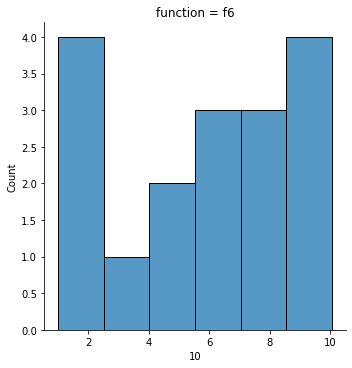

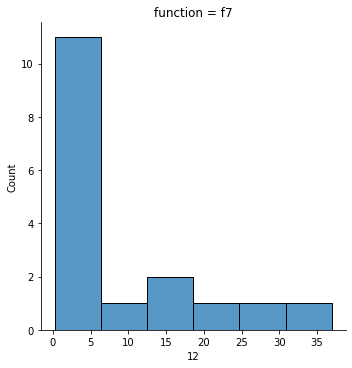

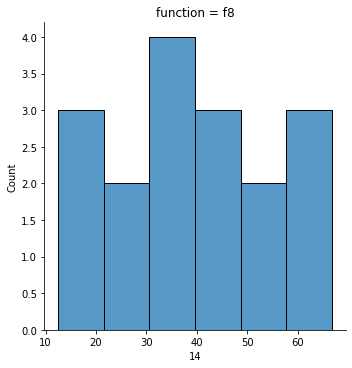

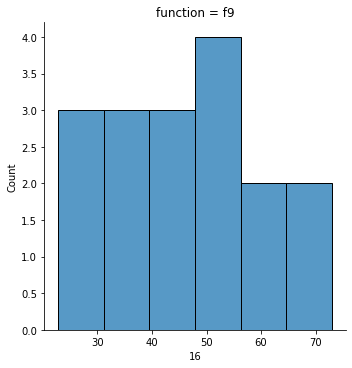

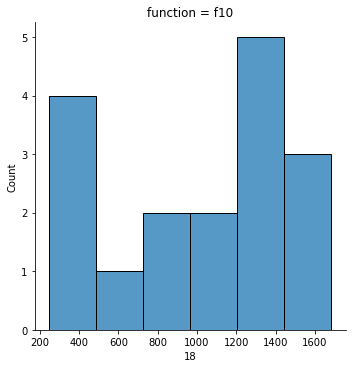

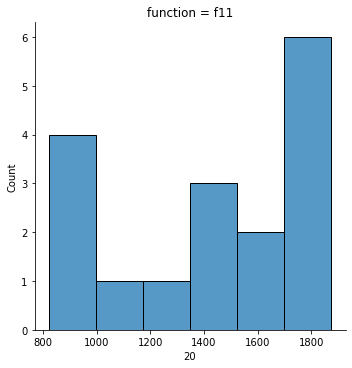

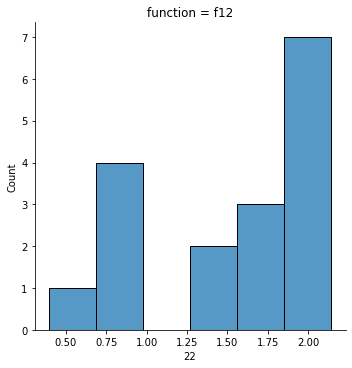

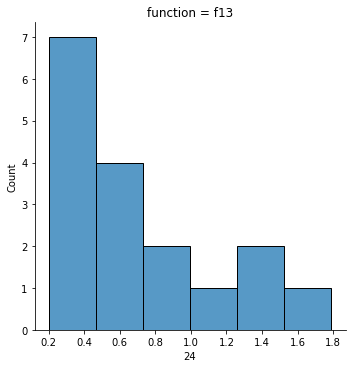

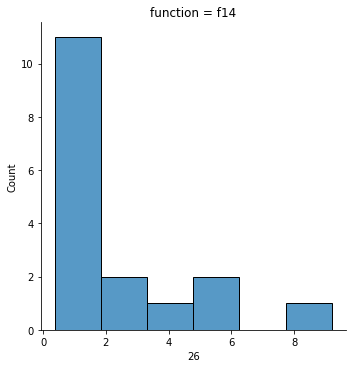

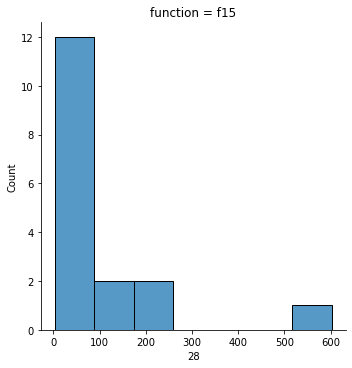

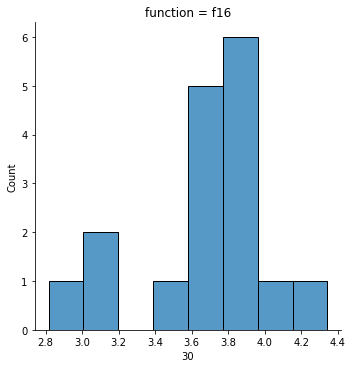

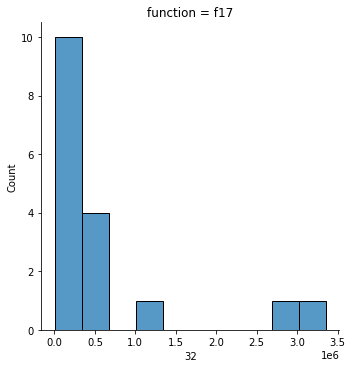

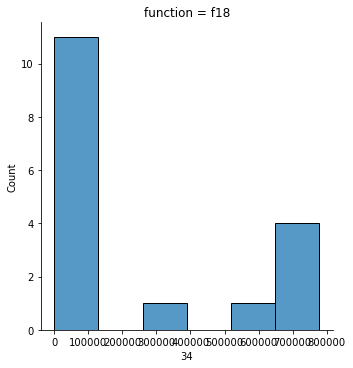

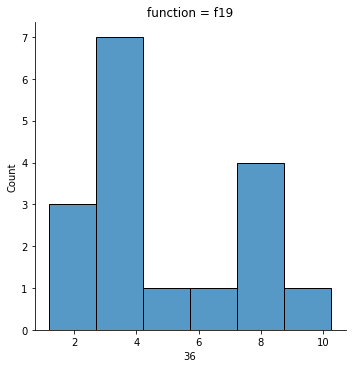

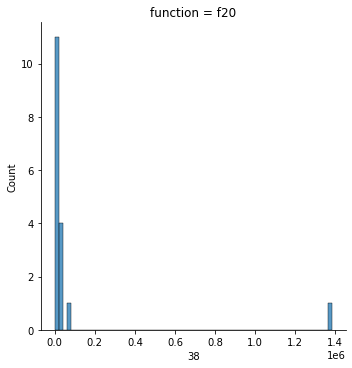

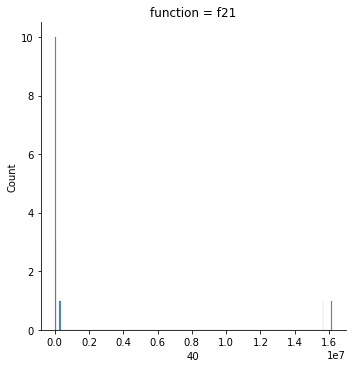

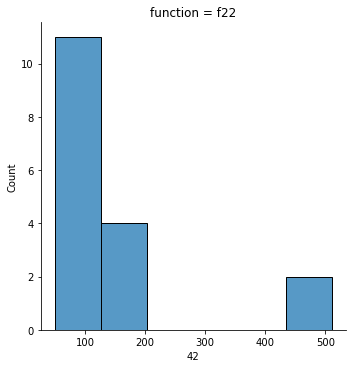

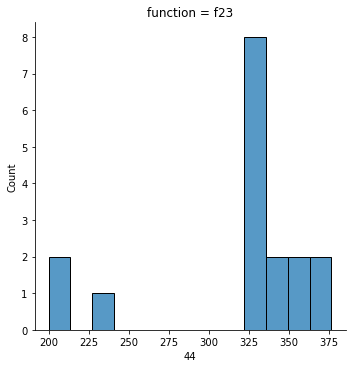

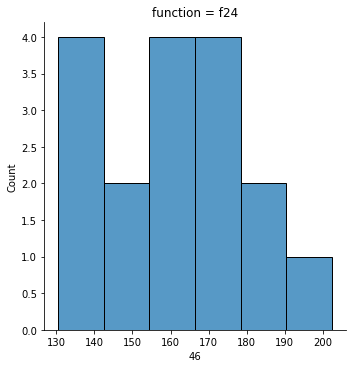

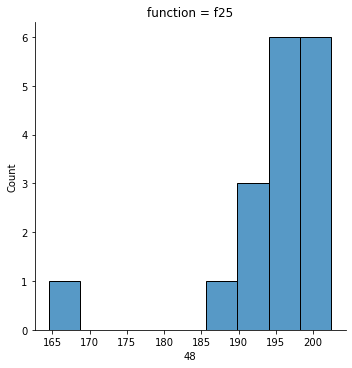

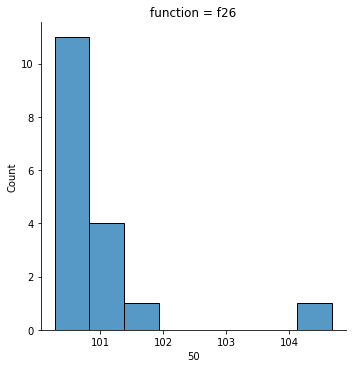

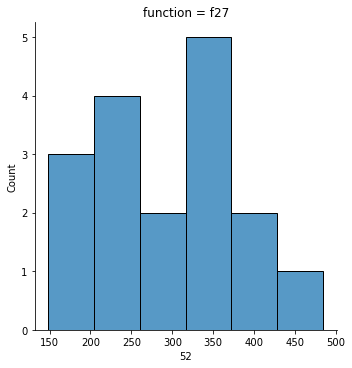

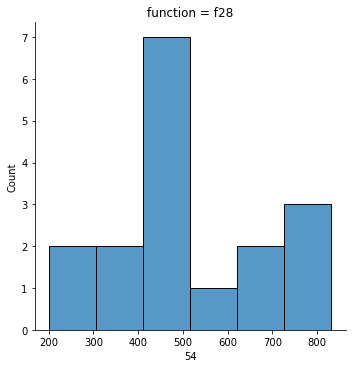

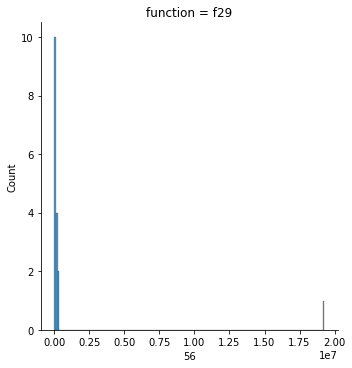

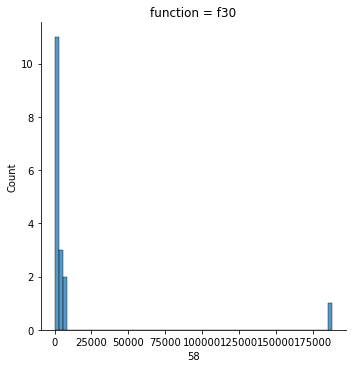

In [14]:
#drow histogram for each function on table
#in table have 30 function 
#each function as row and each row have data for all algorithms 
for i,row in df2.iloc[:,2:].iterrows() : 
    sns.displot(x=row)
    plt.title('function = '+ df2['function'][i])
    plt.show()

In [15]:
ref = rank.set_index('index').sum().sort_values(ascending=False).reset_index()['index'][0]
# call Wilcoxon function and send two parameters [algorithm names and best algorithm ]
wil_tab = Wilcoxon(df2.iloc[:,2:],ref)
#add Reject column that tell if algorithm rejected or not based on p value 
wil_tab.loc[:, 'Reject H0'] = wil_tab.pvalue < float(alpha)
wil_tab

best algorithm is  UMOEAS


,algorithm,statistic,pvalue,Reject H0
0,b3e3pbest,0.0,0.000002,True
1,CMLSP,128.0,0.031603,True
2,DE_b6e6rlwithrestart,0.0,0.000002,True
3,FCDE,2.0,0.000002,True
4,FERDE,79.0,0.001593,True
5,FWA-DM,13.0,0.000006,True
6,GaAPADE,106.0,0.009271,True
7,L-SHADE,83.0,0.002105,True
8,MVMO,0.0,0.000002,True
9,NRGA,2.0,0.000002,True


In [ ]:
rank()

In [16]:
# best algorithm 
cols = ['algorithm','pvalue']
methods = ['bonferroni', 'holm' , 'simes-hochberg', 'fdr_bh', 'hommel']

for metho in methods:
    test_table = sm.multipletests(wil_tab.pvalue, alpha=0.05, method=metho,
                                  is_sorted=False, returnsorted=False)

    wil_tab.loc[:, 'p'+metho.capitalize()] = test_table[1]
    cols.append('p'+metho.capitalize())

print(f'A comparison of adjusted p-values when D = {dim} (control method: {ref})')
display(wil_tab[cols])

A comparison of adjusted p-values when D = 10 (control method: UMOEAS)


,algorithm,pvalue,pBonferroni,pHolm,pSimes-hochberg,pFdr_bh,pHommel
0,b3e3pbest,0.000002,0.000028,0.000028,0.000021,0.000005,0.000017
1,CMLSP,0.031603,0.505654,0.031603,0.031603,0.031603,0.031603
2,DE_b6e6rlwithrestart,0.000002,0.000028,0.000028,0.000021,0.000005,0.000017
3,FCDE,0.000002,0.000034,0.000028,0.000021,0.000005,0.000021
4,FERDE,0.001593,0.025483,0.007964,0.007964,0.002124,0.006371
5,FWA-DM,0.000006,0.000101,0.000057,0.000057,0.000013,0.000056
6,GaAPADE,0.009271,0.148336,0.018542,0.018542,0.009889,0.018542
7,L-SHADE,0.002105,0.033684,0.008421,0.008421,0.002591,0.008421
8,MVMO,0.000002,0.000028,0.000028,0.000021,0.000005,0.000017
9,NRGA,0.000002,0.000034,0.000028,0.000021,0.000005,0.000021
